In [3]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [4]:
len(reviews)

25000

In [5]:
reviews[1]

'story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it  s better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .  '

In [4]:
labels[1]

'NEGATIVE'

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# TASK 1: tokanisation and validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [12]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.07781526027089),
 ('uwe', -3.921875301871158),
 ('seagal', -3.320250105858192),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.775383321170797),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.371577964480997),
 ('pointless', -2.345107387713634),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.247602958576693),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.132613384420701),
 ('wasting', -2.117815554561451),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.921661093801999),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),
 ('insult'

# Transforming Text into Numbers

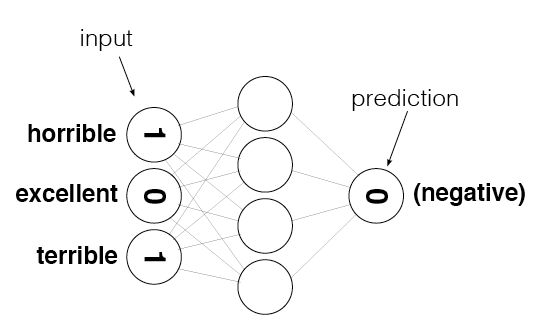

In [13]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

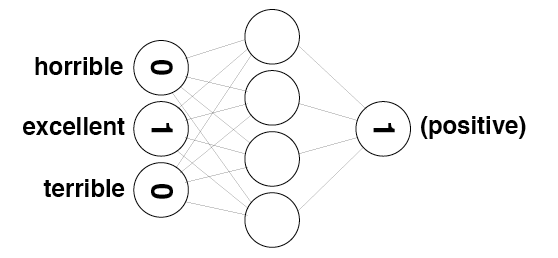

In [14]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data

In [15]:

try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import nltk


word_sent = word_tokenize(reviews[5].lower())
print(word_sent)



['this', 'film', 'lacked', 'something', 'i', 'couldn', 't', 'put', 'my', 'finger', 'on', 'at', 'first', 'charisma', 'on', 'the', 'part', 'of', 'the', 'leading', 'actress', '.', 'this', 'inevitably', 'translated', 'to', 'lack', 'of', 'chemistry', 'when', 'she', 'shared', 'the', 'screen', 'with', 'her', 'leading', 'man', '.', 'even', 'the', 'romantic', 'scenes', 'came', 'across', 'as', 'being', 'merely', 'the', 'actors', 'at', 'play', '.', 'it', 'could', 'very', 'well', 'have', 'been', 'the', 'director', 'who', 'miscalculated', 'what', 'he', 'needed', 'from', 'the', 'actors', '.', 'i', 'just', 'don', 't', 'know', '.', 'br', 'br', 'but', 'could', 'it', 'have', 'been', 'the', 'screenplay', 'just', 'exactly', 'who', 'was', 'the', 'chef', 'in', 'love', 'with', 'he', 'seemed', 'more', 'enamored', 'of', 'his', 'culinary', 'skills', 'and', 'restaurant', 'and', 'ultimately', 'of', 'himself', 'and', 'his', 'youthful', 'exploits', 'than', 'of', 'anybody', 'or', 'anything', 'else', '.', 'he', 'neve

In [16]:

_stopwords = set(stopwords.words('english') + list(punctuation))
print(_stopwords)



{'d', 'he', 'm', "it's", 'i', 'their', ')', '`', 'while', 'yours', 'so', 'can', 'should', 'it', '.', 'then', '-', 'our', "hasn't", 'with', 'more', 'ours', 'an', 'below', ':', 'ourselves', "you'll", 'no', "should've", 'am', 'have', 'shan', 'o', 'couldn', 'doing', '/', 'again', 'yourself', 'over', 'any', "mustn't", 'she', 'both', 'at', 'into', 'the', 'and', 'against', 'out', 'yourselves', 'haven', 'because', '(', '~', 'its', 'been', 'during', 'here', 'ain', 'his', 'they', 'most', "isn't", "needn't", '#', 'under', 'didn', 'shouldn', 'your', 'themselves', 'if', 'you', 've', 'only', "you'd", "wasn't", 'did', 'own', 'having', 'him', 'through', 'above', '?', "couldn't", 'as', 'my', "'", "shouldn't", '"', 'those', 'further', 'these', "didn't", 'will', ';', 'we', 'y', 't', 'before', 'don', '$', '|', 'mustn', 'very', 'after', "wouldn't", 'that', 'than', 'was', 'nor', 'them', ',', 'is', 'of', '\\', 'too', 'on', '_', 'not', 'mightn', 'when', '<', 'has', 'does', 'up', 'this', 'were', 'be', 's', 'me

In [17]:
word_sent =[word for word in word_sent if word not in _stopwords]
print(word_sent)

['film', 'lacked', 'something', 'put', 'finger', 'first', 'charisma', 'part', 'leading', 'actress', 'inevitably', 'translated', 'lack', 'chemistry', 'shared', 'screen', 'leading', 'man', 'even', 'romantic', 'scenes', 'came', 'across', 'merely', 'actors', 'play', 'could', 'well', 'director', 'miscalculated', 'needed', 'actors', 'know', 'br', 'br', 'could', 'screenplay', 'exactly', 'chef', 'love', 'seemed', 'enamored', 'culinary', 'skills', 'restaurant', 'ultimately', 'youthful', 'exploits', 'anybody', 'anything', 'else', 'never', 'convinced', 'love', 'princess', 'br', 'br', 'disappointed', 'movie', 'forget', 'nominated', 'oscar', 'judge']


In [18]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [19]:
list(vocab)

['',
 'reilly',
 'whelmed',
 'rize',
 'ryna',
 'sorel',
 'toting',
 'springsthis',
 'specializing',
 'dystrophic',
 'leaded',
 'temecula',
 'centers',
 'bitchy',
 'raconteur',
 'sneakily',
 'istvan',
 'lassander',
 'solvang',
 'corporatization',
 'orientalism',
 'manic',
 'believable',
 'uranus',
 'gurney',
 'plainly',
 'yam',
 'tlk',
 'gypsies',
 'pheacians',
 'prohibits',
 'marley',
 'marienthal',
 'blooms',
 'cataclysmic',
 'shirking',
 'mcnear',
 'conducive',
 'chilean',
 'sake',
 'keymaster',
 'advisory',
 'pinned',
 'committed',
 'pas',
 'ofstars',
 'toxie',
 'seda',
 'swarg',
 'pundits',
 'everbody',
 'gorgeous',
 'lightning',
 'flatfeet',
 'watery',
 'theatre',
 'disaster',
 'raciest',
 'simplicity',
 'cognizant',
 'authorial',
 'niklas',
 'dresdel',
 'stardust',
 'suppositions',
 'deusexmachina',
 'ryunosuke',
 'religion',
 'yowsa',
 'dhoom',
 'blacklist',
 'priyanaka',
 'jouissance',
 'kriemshild',
 'aznar',
 'slashing',
 'pastimes',
 'marring',
 'dignities',
 'cheesefests',


In [20]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

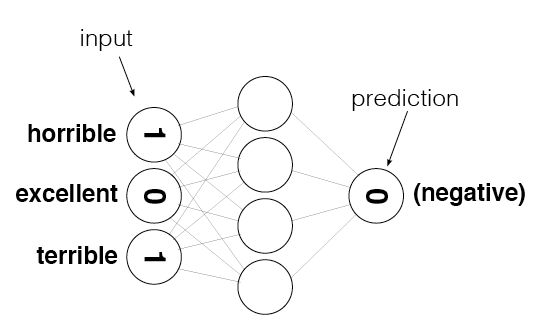

In [21]:
from IPython.display import Image
Image(filename='sentiment_network.png')


In [22]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'reilly': 1,
 'whelmed': 2,
 'rize': 3,
 'ryna': 4,
 'sorel': 5,
 'toting': 6,
 'springsthis': 7,
 'specializing': 8,
 'dystrophic': 9,
 'leaded': 10,
 'temecula': 11,
 'centers': 12,
 'bitchy': 13,
 'raconteur': 14,
 'sneakily': 15,
 'istvan': 16,
 'lassander': 17,
 'solvang': 18,
 'corporatization': 19,
 'orientalism': 20,
 'manic': 21,
 'believable': 22,
 'uranus': 23,
 'gurney': 24,
 'plainly': 25,
 'yam': 26,
 'tlk': 27,
 'gypsies': 28,
 'pheacians': 29,
 'prohibits': 30,
 'marley': 31,
 'marienthal': 32,
 'blooms': 33,
 'cataclysmic': 34,
 'shirking': 35,
 'mcnear': 36,
 'conducive': 37,
 'chilean': 38,
 'sake': 39,
 'keymaster': 40,
 'advisory': 41,
 'pinned': 42,
 'committed': 43,
 'pas': 44,
 'ofstars': 45,
 'toxie': 46,
 'seda': 47,
 'swarg': 48,
 'pundits': 49,
 'everbody': 50,
 'gorgeous': 51,
 'lightning': 52,
 'flatfeet': 53,
 'watery': 54,
 'theatre': 55,
 'disaster': 56,
 'raciest': 57,
 'simplicity': 58,
 'cognizant': 59,
 'authorial': 60,
 'niklas': 61,
 'dre

In [23]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [24]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [25]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [26]:
labels[0]

'POSITIVE'

In [27]:
get_target_for_label(labels[0])

1

In [28]:
labels[1]

'NEGATIVE'

In [29]:
get_target_for_label(labels[1])

0

# Building a Neural Network

In [30]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [31]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [47]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [73]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):143.8 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):142.8 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):143.0 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):142.5 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):142.7 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):142.9 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):142.9 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):143.0 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):142.8 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):142.5 #Correct:11999 #Trained:24000 Training Acc

In [35]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:16.0% Speed(reviews/sec):871.9% #Correct:81 #Tested:161 Testing Accuracy:50.3%

Progress:33.4% Speed(reviews/sec):897.6% #Correct:168 #Tested:335 Testing Accuracy:50.1%

Progress:46.7% Speed(reviews/sec):834.6% #Correct:234 #Tested:468 Testing Accuracy:50.0%

Progress:60.1% Speed(reviews/sec):805.6% #Correct:301 #Tested:602 Testing Accuracy:50.0%

Progress:75.0% Speed(reviews/sec):803.8% #Correct:376 #Tested:751 Testing Accuracy:50.0%

Progress:92.9% Speed(reviews/sec):829.0% #Correct:465 #Tested:930 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):824.3% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [32]:
# Using ReLu
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetworkReLu:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return x * (x > 0)
    
    
    def sigmoid_output_2_derivative(self,output):
        return 1. * (output > 0)

    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [33]:
mlp0 = SentimentNetworkReLu(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [34]:
# train the network
mlp0.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):148.6 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):148.7 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):148.1 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):147.2 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):146.0 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):145.9 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):146.2 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):146.4 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):146.6 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):147.2 #Correct:12000 #Trained:24000 Training Acc

In [35]:
# evaluate our model before training (just to show how horrible it is)
mlp0.test(reviews[-1000:],labels[-1000:])

Progress:19.6% Speed(reviews/sec):1092.% #Correct:98 #Tested:197 Testing Accuracy:49.7%

Progress:34.5% Speed(reviews/sec):941.4% #Correct:173 #Tested:346 Testing Accuracy:50.0%

Progress:51.3% Speed(reviews/sec):926.0% #Correct:257 #Tested:514 Testing Accuracy:50.0%

Progress:75.9% Speed(reviews/sec):1022.% #Correct:380 #Tested:760 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):1094.% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [65]:
#using Tan Funtion for activation 
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetworkTanH:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def tanh(self,x):
        return np.tanh(x)
    
    
    def tanh_output_2_derivative(self,output):
        return (1 - (output ** 2))
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.tanh(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.tanh_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.tanh(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [56]:
nlp = SentimentNetworkTanH(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [57]:
# train the network
nlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):139.2 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):139.0 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):139.6 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):140.2 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):140.4 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):140.5 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):140.4 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):140.5 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):140.8 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):140.9 #Correct:11999 #Trained:24000 Training Acc

In [43]:
# evaluate our model before training (just to show how horrible it is)
nlp.test(reviews[-1000:],labels[-1000:])

NameError: name 'nlp' is not defined

In [66]:
#using Arc Tan Funtion for activation 
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetworkArcTan:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def tanh(self,x):
        return np.arctan(x)
    
    
    def tanh_output_2_derivative(self,output):
        return (np.cos(output) ** 2)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.tanh(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.tanh_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.tanh(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [69]:
mlp1 = SentimentNetworkArcTan(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [70]:
# train the network
mlp1.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):148.2 #Correct:981 #Trained:2501 Training Accuracy:39.2%
Progress:20.8% Speed(reviews/sec):147.4 #Correct:2651 #Trained:5001 Training Accuracy:53.0%
Progress:31.2% Speed(reviews/sec):146.7 #Correct:4474 #Trained:7501 Training Accuracy:59.6%
Progress:41.6% Speed(reviews/sec):146.5 #Correct:6357 #Trained:10001 Training Accuracy:63.5%
Progress:52.0% Speed(reviews/sec):146.8 #Correct:8188 #Trained:12501 Training Accuracy:65.4%
Progress:62.5% Speed(reviews/sec):147.7 #Correct:10015 #Trained:15001 Training Accuracy:66.7%
Progress:72.9% Speed(reviews/sec):147.2 #Correct:11812 #Trained:17501 Training Accuracy:67.4%
Progress:83.3% Speed(reviews/sec):147.0 #Correct:13657 #Trained:20001 Training Accuracy:68.2%
Progress:93.7% Speed(reviews/sec):146.8 #Correct:15530 #Trained:22501 Training Accuracy:69.0%
Progress:99.9% Speed(reviews/sec):146.7 #Correct:16616 #Trained:24000 Training Ac

In [71]:
# evaluate our model before training (just to show how horrible it is)
mlp1.test(reviews[-1000:],labels[-1000:])

Progress:20.3% Speed(reviews/sec):1084.% #Correct:167 #Tested:204 Testing Accuracy:81.8%

Progress:41.7% Speed(reviews/sec):1113.% #Correct:337 #Tested:418 Testing Accuracy:80.6%

Progress:57.3% Speed(reviews/sec):1019.% #Correct:465 #Tested:574 Testing Accuracy:81.0%

Progress:71.7% Speed(reviews/sec):956.2% #Correct:566 #Tested:718 Testing Accuracy:78.8%

Progress:86.9% Speed(reviews/sec):927.6% #Correct:680 #Tested:870 Testing Accuracy:78.1%

Progress:99.9% Speed(reviews/sec):956.3% #Correct:789 #Tested:1000 Testing Accuracy:78.9%

In [39]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [40]:
mlp2 = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [41]:
# train the network
mlp2.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):149.9 #Correct:1788 #Trained:2501 Training Accuracy:71.4%
Progress:20.8% Speed(reviews/sec):148.5 #Correct:3777 #Trained:5001 Training Accuracy:75.5%
Progress:31.2% Speed(reviews/sec):147.8 #Correct:5854 #Trained:7501 Training Accuracy:78.0%
Progress:41.6% Speed(reviews/sec):147.3 #Correct:7989 #Trained:10001 Training Accuracy:79.8%
Progress:52.0% Speed(reviews/sec):147.7 #Correct:10117 #Trained:12501 Training Accuracy:80.9%
Progress:62.5% Speed(reviews/sec):147.5 #Correct:12246 #Trained:15001 Training Accuracy:81.6%
Progress:72.9% Speed(reviews/sec):147.3 #Correct:14384 #Trained:17501 Training Accuracy:82.1%
Progress:83.3% Speed(reviews/sec):147.0 #Correct:16556 #Trained:20001 Training Accuracy:82.7%
Progress:93.7% Speed(reviews/sec):147.0 #Correct:18746 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):147.1 #Correct:20064 #Trained:24000 Training 

In [42]:
# evaluate our model before training (just to show how horrible it is)
mlp2.test(reviews[-1000:],labels[-1000:])

Progress:21.0% Speed(reviews/sec):1123.% #Correct:182 #Tested:211 Testing Accuracy:86.2%

Progress:44.0% Speed(reviews/sec):1173.% #Correct:388 #Tested:441 Testing Accuracy:87.9%

Progress:60.5% Speed(reviews/sec):1073.% #Correct:528 #Tested:606 Testing Accuracy:87.1%

Progress:77.3% Speed(reviews/sec):1029.% #Correct:655 #Tested:774 Testing Accuracy:84.6%

Progress:93.2% Speed(reviews/sec):994.0% #Correct:789 #Tested:933 Testing Accuracy:84.5%

Progress:99.9% Speed(reviews/sec):1005.% #Correct:849 #Tested:1000 Testing Accuracy:84.9%